In [1]:
import qiskit
qiskit.__qiskit_version__ # qiskit software version in form of python dictionary

{'qiskit-terra': '0.24.0', 'qiskit-aer': '0.12.0', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table # qiskit software version in form of table

In [3]:
%qiskit_copyright # copy right

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# QuantumCircuit:
    # can be thought as the instructions of the quantum system.
    # It holds all your quantum operations.
# AerSimulator:
    # is the Aer high performance circuit simulator.
# plot_histogram:
    # creates histograms.

In [5]:
circuit = QuantumCircuit(2, 2)
# Here, you are initializing with 2 qubits in the zero state;
# with 2 classical bits set to zero; and circuit is the quantum circuit.

In [6]:
# The gates are added to the circuit one-by-one to form the Bell state
# NB: the U in the below bell state represent phsai
# |U> = (|00> + |11>)/ square root of 2

circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

# QuantumCircuit.h(0):
    # A Hadamard gate H on qubit 0, which puts it into a superposition state.

# QuantumCircuit.cx(0, 1):
    # A controlled-Not operation (CNOT) on control qubit 0 and target qubit 1,
    # putting the qubits in an entangled state.
    
# QuantumCircuit.measure([0,1], [0,1]):
    # if you pass the entire quantum and classical registers to measure,
    # the ith qubit’s measurement result will be stored in the ith classical bit.

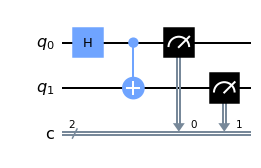

In [7]:
circuit.draw("mpl")
# You can use qiskit.circuit.QuantumCircuit.draw() to view the circuit that you
# have designed in the various forms used in many textbooks and research articles.

# The default backend for QuantumCircuit.draw() or
# qiskit.visualization.circuit_drawer() is the text backend.

# You can use any of the valid circuit drawer backends as the value for this config,
# this includes text, mpl, latex, and latex_source, but the default is `text`

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy

# Qiskit Aer is a high performance simulator framework for quantum circuits.
# It provides several backends to achieve different simulation goals.

# If you have issues installing Aer, you can alternatively use the Basic Aer provider
# by replacing Aer with BasicAer. Basic Aer is included in Qiskit Terra.

# To simulate this circuit, you will use the AerSimulator.
# Each run of this circuit will yield either the bit string 00 or 11.

In [9]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

# Once you have a result object, you can access the counts via the method get_counts(circuit).
# This gives you the aggregate outcomes of the experiment you ran.

counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# As expected, the output bit string is 00 approximately 50 percent of the time.
# The number of times the circuit is run can be specified via the shots argument of the
# execute method. The number of shots of the simulation was set to be 1000 (the default is 1024).


Total count for 00 and 11 are: {'00': 508, '11': 492}


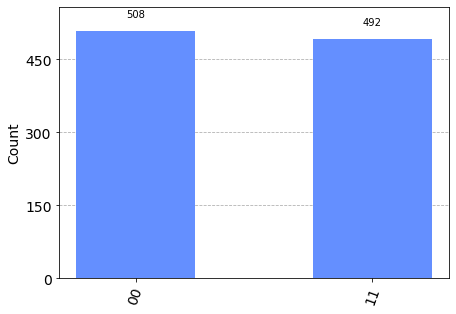

In [10]:
# including the function plot_histogram, to view your results.
plot_histogram(counts)

# The observed probabilities Pr(00) and Pr(11) are computed by
# taking the respective counts and dividing by the total number of shots.

# NOTE:
# Try changing the shots keyword in the run() method to see how the estimated probabilities change.